In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
donnees = pd.read_excel('perceptron_data.xlsx')
donnees

,N,Longeur Sépale,Longeur Pétale,Type de Fleurs,Type De RdN
0,1,5.1,1.4,Iris-setosa,0
1,2,4.9,1.4,Iris-setosa,0
2,3,4.7,1.3,Iris-setosa,0
3,4,4.6,1.5,Iris-setosa,0
4,5,5.0,1.4,Iris-setosa,0
...,...,...,...,...,...
95,96,5.7,4.2,Iris-versicolor,1
96,97,5.7,4.2,Iris-versicolor,1
97,98,6.2,4.3,Iris-versicolor,1
98,99,5.1,3.0,Iris-versicolor,1


In [20]:
baseApprentissage = pd.read_excel('perceptron_data.xlsx',sheet_name='Base d\'apprentissage S')
baseApprentissage

,Biais,Longeur Sépale,Longeur Pétale,Type de Fleurs,C
0,1,5.1,1.4,Iris-setosa,0
1,1,5.2,3.9,Iris-versicolor,1
2,1,4.9,1.4,Iris-setosa,0
3,1,6.6,4.6,Iris-versicolor,1
4,1,4.7,1.3,Iris-setosa,0
5,1,6.6,4.6,Iris-versicolor,1
6,1,4.6,1.5,Iris-setosa,0
7,1,4.9,3.3,Iris-versicolor,1
8,1,5.0,1.4,Iris-setosa,0
9,1,6.3,4.7,Iris-versicolor,1


In [21]:
baseDeTests = pd.read_excel('perceptron_data.xlsx',sheet_name='Base de tests')
baseDeTests

,N,Longeur Sépale,Longeur Pétale,Type de Fleurs,Type De RdN
0,1,5.4,1.5,Iris-setosa,0
1,2,4.8,1.6,Iris-setosa,0
2,3,4.8,1.4,Iris-setosa,0
3,4,4.3,1.1,Iris-setosa,0
4,5,5.8,1.2,Iris-setosa,0
5,6,5.0,3.5,Iris-versicolor,1
6,7,5.9,4.2,Iris-versicolor,1
7,8,6.0,4.0,Iris-versicolor,1
8,9,6.1,4.7,Iris-versicolor,1
9,10,5.6,3.6,Iris-versicolor,1


In [6]:
print(donnees,baseApprentissage,baseDeTests)

      N  Longeur Sépale   Longeur Pétale   Type de Fleurs  Type De RdN
0     1              5.1             1.4      Iris-setosa            0
1     2              4.9             1.4      Iris-setosa            0
2     3              4.7             1.3      Iris-setosa            0
3     4              4.6             1.5      Iris-setosa            0
4     5              5.0             1.4      Iris-setosa            0
..  ...              ...             ...              ...          ...
95   96              5.7             4.2  Iris-versicolor            1
96   97              5.7             4.2  Iris-versicolor            1
97   98              6.2             4.3  Iris-versicolor            1
98   99              5.1             3.0  Iris-versicolor            1
99  100              5.7             4.1  Iris-versicolor            1

[100 rows x 5 columns]     Biais  Longeur Sépale   Longeur Pétale   Type de Fleurs  C
0       1              5.1             1.4      Iris-setosa  

In [22]:
xApprentissage = baseApprentissage.iloc[:,0:3].values

In [23]:
cApprentissage = baseApprentissage[['C']].values

In [28]:
w = np.random.randint(0,8,3)
print(w)

[6 2 1]


In [10]:
print(f'xApprentissage:{xApprentissage}\ncApprentissage:{cApprentissage}\nw:{w}')

xApprentissage:[[1.  5.1 1.4]
 [1.  5.2 3.9]
 [1.  4.9 1.4]
 [1.  6.6 4.6]
 [1.  4.7 1.3]
 [1.  6.6 4.6]
 [1.  4.6 1.5]
 [1.  4.9 3.3]
 [1.  5.  1.4]
 [1.  6.3 4.7]
 [1.  5.4 1.7]
 [1.  5.7 4.5]
 [1.  4.6 1.4]
 [1.  6.5 4.6]
 [1.  5.  1.5]
 [1.  5.5 4. ]
 [1.  4.4 1.4]
 [1.  6.9 4.9]
 [1.  4.9 1.5]
 [1.  7.  4.7]
 [1.  6.4 4.5]]
cApprentissage:[[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]]
w:[0 1 0]


In [17]:
def getPerceptron(x,c,w):
    for i in range(x.shape[0]):
        netj = 0
        for j in range(x.shape[1]):
            netj += x[i][j] * w[j]
        y = 1 if netj > 0 else 0
        for j in range(x.shape[1]):
            w[j] = w[j] + (c[i][0] - y) * x[i][j]
        print(f'{c[i][0]} : {y}')
    return w

In [24]:
p = getPerceptron(xApprentissage,cApprentissage,w)

0 : 1
1 : 0
0 : 1
1 : 0
0 : 1
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
1 : 1


In [25]:
xTest = baseDeTests.iloc[:,1:3].values
ones = np.ones((xTest.shape[0],1))
xTest = np.concatenate((ones,xTest),axis=1)
cTest = baseDeTests[['Type De RdN']].values


In [27]:
getPerceptron(xTest,cTest,p)

0 : 0
0 : 0
0 : 0
0 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1


array([-1, -1,  3])

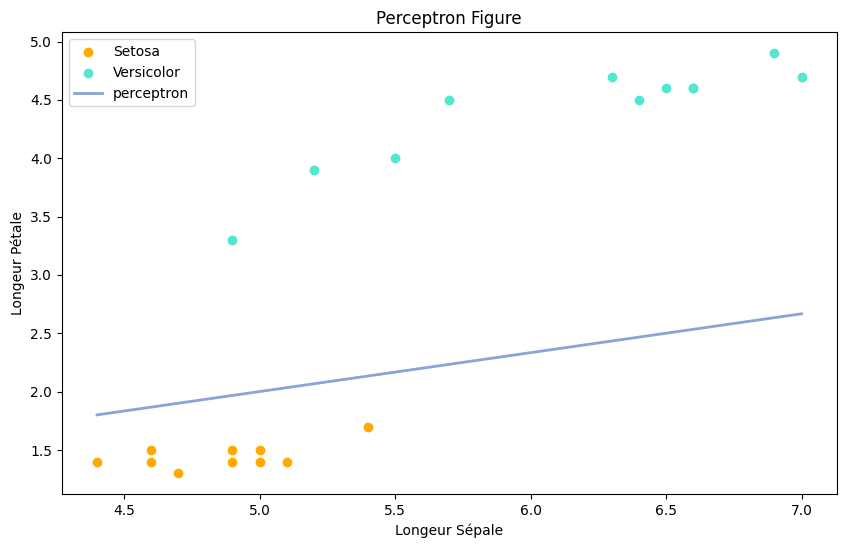

In [30]:
def perceptronViz(x, c, w):
    plt.figure(figsize=(10, 6))
    plt.scatter(x[c.flatten() == 0, 1], x[c.flatten() == 0, 2], color='#ffaa00', marker='o', label='Setosa')
    plt.scatter(x[c.flatten() == 1, 1], x[c.flatten() == 1, 2], color='#50e8d1', marker='o', label='Versicolor')
    x_vals = np.linspace(min(x[:, 1]), max(x[:, 1]), 100)
    y_vals = -(w[0] + w[1] * x_vals) / w[2]
    plt.plot(x_vals, y_vals, color='#8aa4d5', linestyle='-', linewidth=2, label='perceptron')
    plt.xlabel('Longeur Sépale')
    plt.ylabel('Longeur Pétale')
    plt.legend()
    plt.title('Perceptron Figure')
    plt.show()
perceptronViz(xApprentissage, cApprentissage, p)


In [32]:
from flask import Flask, request, render_template
import joblib

In [33]:
joblib.dump(p, 'perceptron_model.pkl')

['perceptron_models.pkl']